In [3]:
import pandas as pd

# Datei laden
file_path = "../data/fruit_data_cleaned.xlsx" 
data = pd.read_excel(file_path)

print(data.head())

print(data.info())

   Unnamed: 0 fruit_type         color   size     weight
0           0      grape        Yellow   Tiny   8.303385
1           1      apple          Pink  Large  80.976370
2           2     banana   Pale Yellow  Large  74.615192
3           3      grape           Red   Tiny   6.924070
4           4     banana  Creamy White  Large  82.002542
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  198 non-null    int64  
 1   fruit_type  198 non-null    object 
 2   color       198 non-null    object 
 3   size        198 non-null    object 
 4   weight      198 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 7.9+ KB
None


In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Kategoriale Features: One-Hot
categorical_features = ["color", "size"]
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[categorical_features])

# Numerische Features: Skalierung
scaler = StandardScaler()
scaled_weight = scaler.fit_transform(data[["weight"]])


In [5]:
# Daten kombinieren
X_prepared = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
X_prepared["weight"] = scaled_weight
X_prepared["fruit_types"] = data["fruit_type"]  # Zielvariable 

In [6]:
from sklearn.model_selection import train_test_split

# Zielvariable und Features trennen
X = X_prepared.drop("fruit_types", axis=1)
y = X_prepared["fruit_types"]

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# logistic model trainieren
logistic_model = LogisticRegression(solver="lbfgs", random_state=47)
logistic_model.fit(X_train, y_train)


LogisticRegression(random_state=47)

In [8]:
# Vorhersagen
y_pred_logistic = logistic_model.predict(X_test)

# Ergebnis bewerten
print("Logistische Regression:")
print(classification_report(y_test, y_pred_logistic))

Logistische Regression:
              precision    recall  f1-score   support

       apple       0.81      1.00      0.90        13
      banana       1.00      0.70      0.82        10
       grape       1.00      1.00      1.00        17

    accuracy                           0.93        40
   macro avg       0.94      0.90      0.91        40
weighted avg       0.94      0.93      0.92        40



In [9]:
#Intepretation zur logistischen Regression
# Apple:
# Recall von 1.00 bedeutet, dass alle Äpfel korrekt erkannt werden.
# Präzision von 0.81 weist darauf hin, dass einige falsch-positiv als Äpfel klassifiziert wurden.


# Banana:
# Präzision von 1.00 zeigt, dass alle als Bananen klassifizierten auch tatsächlich Bananen sind.
# Recall von 0.70 zeigt, dass 30% der tatsächlichen Bananen übersehen wurden.


#Grape:
# Precision, Recall, und F1-Score sind alle perfekt (1.00).

#Gesamtleistung:
#Accuracy: 0.93. Das Modell klassifiziert 93% der Testdaten korrekt

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Modell trainieren
tree_model = DecisionTreeClassifier(max_depth=5, random_state=47)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=47)

In [11]:
# Vorhersagen
y_pred_tree = tree_model.predict(X_test)

# Ergebnis bewerten
print("Entscheidungsbaum:")
print(classification_report(y_test, y_pred_tree))

Entscheidungsbaum:
              precision    recall  f1-score   support

       apple       0.71      0.92      0.80        13
      banana       0.83      0.50      0.62        10
       grape       1.00      1.00      1.00        17

    accuracy                           0.85        40
   macro avg       0.85      0.81      0.81        40
weighted avg       0.86      0.85      0.84        40



In [12]:
#Interpretation Entscheidungsbaum 1

# Apple:
# Diese Klasse hat eine relativ gute Leistung, da der Recall hoch ist (92 % der Äpfel werden korrekt erkannt), 
# aber die Präzision ist moderat (71 % der als "apple" klassifizierten Instanzen sind tatsächlich Äpfel).


#Banana:
# Für Bananen ist die Präzision relativ hoch (83 % der als "banana" klassifizierten Instanzen sind tatsächlich Bananen), 
# aber der Recall ist mit 50 % niedrig, was bedeutet, dass nur die Hälfte der tatsächlichen Bananen korrekt erkannt wird. 
# Das Modell hat Schwierigkeiten, Bananen zu identifizieren.

#Grape:
#Precision, Recall und F1-Score sind alle perfekt (1.00). 
#Genau wie bei der logistischen Regression erkennt der Entscheidungsbaum Trauben fehlerfrei.

#Accuracy: 0.85. Das Modell klassifiziert 85% der Beobachtungen korrekt, was leicht unter der Genauigkeit der logistischen Regression (0.93) liegt.



In [13]:
#Hyperparamtertuning Decision Tree

#Hyperparameter-Raum definieren: Wir testen verschiedene Kombinationen von Tiefe, Split-Kriterien und Mindestanzahl von Samples in Knoten.

#GridSearchCV: Automatisierte Suche nach der besten Kombination der Hyperparameter basierend auf der Genauigkeit (Accuracy).

#Kreuzvalidierung: Sorgt dafür, dass das Modell auf verschiedenen Splits des Trainingsdatensatzes getestet wird, um Überanpassung zu vermeiden.

#Bewertung: Nach dem Tuning wird das beste Modell auf den Testdaten evaluiert



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Entscheidungsbaum-Modell
decision_tree = DecisionTreeClassifier(random_state=47)

# Hyperparameter-Raum definieren
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

# GridSearchCV einrichten
grid_search = GridSearchCV(
    estimator=decision_tree,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,  # 5-fache Kreuzvalidierung
    verbose=1,  # Fortschritt anzeigen
    n_jobs=-1  # Mehrere Kerne verwenden
)

In [14]:
# Tuning durchführen
grid_search.fit(X_train, y_train)

# Beste Hyperparameter anzeigen
print("Beste Parameter:", grid_search.best_params_)
print("Beste Kreuzvalidierungs-Genauigkeit:", grid_search.best_score_)

# Optimiertes Modell vorhersagen und bewerten
best_tree = grid_search.best_estimator_
y_pred_tree = best_tree.predict(X_test)

from sklearn.metrics import classification_report
print("Entscheidungsbaum nach Tuning:")
print(classification_report(y_test, y_pred_tree))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Beste Parameter: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Beste Kreuzvalidierungs-Genauigkeit: 0.8735887096774194
Entscheidungsbaum nach Tuning:
              precision    recall  f1-score   support

       apple       0.86      0.92      0.89        13
      banana       0.89      0.80      0.84        10
       grape       1.00      1.00      1.00        17

    accuracy                           0.93        40
   macro avg       0.92      0.91      0.91        40
weighted avg       0.93      0.93      0.92        40



In [15]:

#Die Ergebnisse nach dem Hyperparameter-Tuning zeigen eine deutliche Verbesserung der Leistung des Entscheidungsbaums. 


# Precision:

# Apple: 0.86 – Eine deutliche Verbesserung im Vergleich zu 0.71 in der ursprünglichen Version. 86 % der als "apple" klassifizierten Instanzen sind tatsächlich Äpfel.
# Banana: 0.89 – Auch eine Verbesserung, was darauf hinweist, dass weniger Falsch-Positive bei der Klassifizierung von Bananen vorliegen.
# Grape: 1.00 – Perfekte Präzision, was bedeutet, dass alle als "grape" klassifizierten Instanzen auch Trauben sind.

# Recall:

# Apple: 0.92 – Der Recall für Äpfel bleibt konstant, was darauf hindeutet, dass weiterhin fast alle Äpfel korrekt erkannt werden.
# Banana: 0.80 – Eine erhebliche Verbesserung gegenüber dem ursprünglichen Recall von 0.50. Das Modell erkennt nun mehr Bananen korrekt.
# Grape: 1.00 – Der Recall bleibt bei 100 %, was bedeutet, dass alle Trauben korrekt erkannt werden.

# F1-Score:

# Apple: 0.89 – Ein deutlicher Anstieg im Vergleich zu 0.80, was auf eine ausgewogene Verbesserung von Präzision und Recall hinweist.
# Banana: 0.84 – Der F1-Score für Bananen hat sich ebenfalls verbessert, was die ausbalancierte Verbesserung von Präzision und Recall widerspiegelt.
# Grape: 1.00 – Perfekter F1-Score, was die exzellente Leistung des Modells bei Trauben bestätigt.

# Genauigkeit (Accuracy): 
# 0.93 – Das Modell hat nun eine Gesamtgenauigkeit von 93 %, was eine signifikante Verbesserung gegenüber den ursprünglichen 85 % ist.


#Vergleich zur logistischen Regression (solver:lbfgs)

# Logistische Regression bietet eine etwas bessere Leistung bei der Apple-Klasse, insbesondere bei der Präzision und Recall.
# Der Entscheidungsbaum nach Tuning hat eine bessere Leistung bei der Banana-Klasse aufgrund eines höheren Recalls und F1-Scores.
# Grape wird von beiden Modellen perfekt erkannt (Präzision, Recall, F1-Score von 1.00).
# Gesamtgenauigkeit ist für beide Modelle identisch (93 %), aber die Verteilung der Metriken variiert je nach Klasse.





In [17]:
#ROC-CURVE
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize


# Logistische Regression: Wahrscheinlichkeiten
y_prob_logistic = logistic_model.predict_proba(X_test)

# Entscheidungsbaum: Wahrscheinlichkeiten
y_prob_tree = best_tree.predict_proba(X_test)

# Binarisieren der Zielvariable One-vs-Rest
y_test_bin = label_binarize(y_test, classes=["apple", "banana", "grape"])

# Durchschnittliche ROC-Kurve berechnen (micro-average)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test_bin.ravel(), y_prob_logistic.ravel())
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

fpr_tree, tpr_tree, _ = roc_curve(y_test_bin.ravel(), y_prob_tree.ravel())
roc_auc_tree = auc(fpr_tree, tpr_tree)


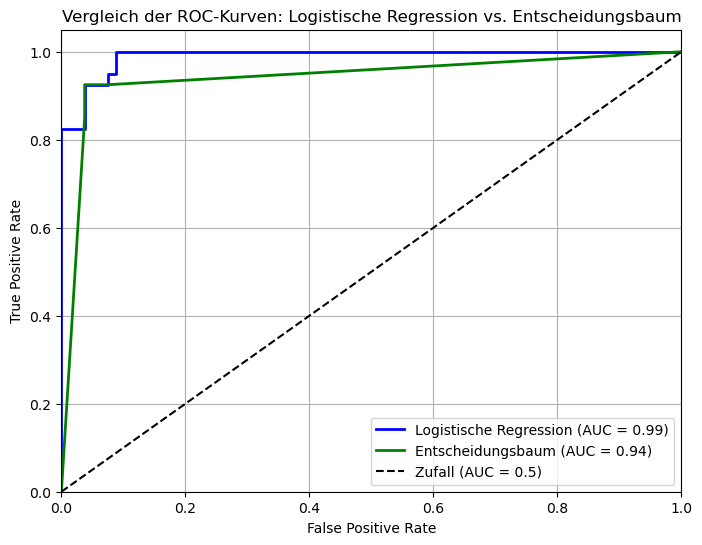

In [18]:
# Plotten
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'Logistische Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Entscheidungsbaum (AUC = {roc_auc_tree:.2f})')

# Diagonale (Random Guessing)
plt.plot([0, 1], [0, 1], 'k--', label="Zufall (AUC = 0.5)")

# Plot-Details
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Vergleich der ROC-Kurven: Logistische Regression vs. Entscheidungsbaum")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [19]:
# Die logistische Regression zeigt eine nahezu perfekte Trennung der Klassen, was durch den hohen AUC-Wert von 0.99 deutlich wird.
# Der Entscheidungsbaum hat nach dem Tuning ebenfalls sehr gute Leistungen (AUC von 0.94). Dies weist darauf hin, dass der Tuning-Prozess dem Modell geholfen hat, seine Leistung zu verbessern. 
# Gewinner: logistische Regression